<a href="https://colab.research.google.com/github/Bciuccio/biblioteca_pandas/blob/main/Trabalhando_com_duas_bases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case 2

Agoar iremos tratar e uma loja de varejo que deseja criar metricxas para acompanhar os seus resultados.

Para isso eles disponibilizaram  2 bases uma de Vendas e uma de clientes

O objetivo da empresa é saber:

Departamentos mais vendidos?

Media de preço com frete por departamento?

Quantidade de vendas por mes?

Media de renda para cada tipo de canal?

Media de idade de clientes por bandeira?


## Premissas do negocio

Para compras sem UF considerar o estado de MS

Preço não pode ser maior que o preço + frete

# Configurando os dados

Iremos analisar as bases separadamente primeiro

Para assim podermos tratar os dados antes de analisarmos

Seguiremos sempre os seguintes passos

Importação das bibliotecas

Importação das bases

base.head() - da base que ira tratar

base.rename() - para modificar o nome das colunas

base.dtypes - para verificar se os tipos de variavel fazem sentido para a base

base.info() - para analisar se possui valores nulos

base.gorupby(*'coluna a ser analisada'*).*coluna de referencia*.nunique().sort_values(ascending=false)

In [68]:
import pandas as pd
import seaborn as sns

In [69]:
varejo = pd.read_excel('/content/varejo.xlsx')
cliente_varejo = pd.read_excel('/content/cliente_varejo.xlsx')

In [70]:
varejo.head()


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [71]:
varejo = varejo.rename(columns={'idcompra':'id_compra', 'idcanalvenda': 'id_canal_venda'})
varejo.dtypes

id_compra                     int64
id_canal_venda               object
bandeira                     object
Data                 datetime64[ns]
Preço                       float64
Preço_com_frete             float64
Nome_Departamento            object
estado                       object
cliente_Log                   int64
dtype: object

In [72]:
varejo.info()
# fazendo a analise do info na base do varejo podemos ver que temos dados nulos no preço e no estado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_compra          80228 non-null  int64         
 1   id_canal_venda     80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [73]:
varejo.groupby('id_canal_venda').id_compra.nunique().sort_values(ascending=False)
# apos vermos que este o dado de APP e Aplicativo são iguias precisamos modificar o nome dele
#Para isso utilizamos a função replace

# Sintaxe :

# base[Coluna] = base[Coluna].tipo de dado (str, float, int).replace('trecho a ser subestituido', 'trecho que ira substituir')


id_canal_venda
Mobile        24732
Internet      24515
Aplicativo    21425
APP             139
Name: id_compra, dtype: int64

In [74]:
varejo['id_canal_venda'] = varejo['id_canal_venda'].str.replace('APP', 'Aplicativo')
varejo.groupby('id_canal_venda').id_compra.nunique().sort_values(ascending=False)

id_canal_venda
Mobile        24732
Internet      24515
Aplicativo    21539
Name: id_compra, dtype: int64

In [75]:
#Analisando agora as bandeira
varejo.groupby('bandeira').id_compra.nunique().sort_values(ascending=False)

bandeira
B    38483
A    27679
Name: id_compra, dtype: int64

In [76]:
#Analisando agora os nomes de departamento
varejo.groupby('Nome_Departamento').id_compra.nunique().sort_values(ascending=False)

Nome_Departamento
Telefones e Celulares     14495
Eletrodomesticos          10501
Eletroportateis            9593
TVs e Acessorios           5326
Informatica                5290
Beleza e Saude             4626
Bebes                      4531
Moveis                     4175
Utilidades Domesticas      3728
Acessorios e Inovacoes     3548
Audio                      1794
Tablets                    1770
Brinquedos                 1320
Ferramentas                1111
Ar e Ventilacao             951
Automotivo                  895
Games                       764
Produtos de Limpeza         713
Perfumaria                  624
Esporte e Lazer             531
Casa e Construcao           263
Cama, Mesa e Banho          153
Decoracao                   134
Relogios                    134
Malas e Mochilas            114
Linha Industrial             86
Pet Shop                     43
Cine e Foto                  11
TV e Video                    5
Moda                          3
Alimentos             

In [77]:
# tirando os espaços em branco
varejo['Nome_Departamento'] = varejo['Nome_Departamento'].str.replace(' ','_')
varejo.groupby('Nome_Departamento').id_compra.nunique().sort_values(ascending=False)

Nome_Departamento
Telefones_e_Celulares     14495
Eletrodomesticos          10501
Eletroportateis            9593
TVs_e_Acessorios           5326
Informatica                5290
Beleza_e_Saude             4626
Bebes                      4531
Moveis                     4175
Utilidades_Domesticas      3728
Acessorios_e_Inovacoes     3548
Audio                      1794
Tablets                    1770
Brinquedos                 1320
Ferramentas                1111
Ar_e_Ventilacao             951
Automotivo                  895
Games                       764
Produtos_de_Limpeza         713
Perfumaria                  624
Esporte_e_Lazer             531
Casa_e_Construcao           263
Cama,_Mesa_e_Banho          153
Decoracao                   134
Relogios                    134
Malas_e_Mochilas            114
Linha_Industrial             86
Pet_Shop                     43
Cine_e_Foto                  11
TV_e_Video                    5
Moda                          3
Alimentos             

In [78]:
#Analisando agora os estados
varejo.groupby('estado').id_compra.nunique().sort_values(ascending=False)

estado
SP    25962
RJ    16213
MG    10538
RS     4099
PR     2754
BA     2028
SC     1932
DF     1902
PE     1632
GO     1603
ES     1254
CE     1007
PB      536
MT      510
RN      463
AL      461
SE      340
PI      247
MA      129
PA      108
TO      101
RO       15
AM       15
AC       10
RR        7
AP        3
Name: id_compra, dtype: int64

In [79]:
cliente_varejo.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [80]:
cliente_varejo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [81]:
#mundando o tipo de dado da renda
cliente_varejo = cliente_varejo.astype({'renda':'float'})
cliente_varejo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [82]:
cliente_varejo.groupby('idade').cliente_Log.nunique().sort_values(ascending=False)

idade
19    411
51    408
33    407
48    406
80    401
     ... 
73    332
27    330
65    325
20    325
45    322
Name: cliente_Log, Length: 72, dtype: int64

# Tratando os dados Nulos

Apos toda a preparação dos dados feita posteriormente podemos agoa tratar os dados nulos que apareceram nas bases.

No caso em questão apenas uma base apresentou dados nulos

Para tratar esses a dados irmos primeiro realizar um filtro

base[base['coluna'].isnull()]

Existem algumas formas de tratar esse dados nulo

Uma forma é eliminar completamente as linhas nulas

base = base.dropna()

A outra forma é substituir os nulos por um dado

base['coluna'].fillna('oque ira preencher o nulo')

In [83]:
varejo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_compra          80228 non-null  int64         
 1   id_canal_venda     80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [84]:
varejo[varejo['estado'].isnull()]

,id_compra,id_canal_venda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [85]:
varejo_nulos_eliminados = varejo.dropna()
varejo_nulos_eliminados.info()


<class 'pandas.core.frame.DataFrame'>
Index: 79926 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_compra          79926 non-null  int64         
 1   id_canal_venda     79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [86]:
varejo["estado"].fillna('MS', inplace=True)
varejo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_compra          80228 non-null  int64         
 1   id_canal_venda     80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [87]:
varejo.describe()


,id_compra,Data,Preço,Preço_com_frete,cliente_Log
count,80228.000000,80228,79926.000000,80228.000000,80228.000000
mean,251001.882448,2023-03-02 02:53:27.458742528,906.589129,908.619823,13935.464676
min,0.000000,2023-01-02 00:00:00,6.320000,6.320000,1.000000
25%,126835.000000,2023-02-01 00:00:00,144.320000,150.706000,6920.750000
50%,251760.000000,2023-03-02 00:00:00,531.240000,535.120000,13938.000000
75%,375925.000000,2023-04-01 00:00:00,1199.200000,1215.240000,20918.000000
max,723410.000000,2023-04-30 00:00:00,14439.240000,14439.240000,27982.000000
std,144272.920296,NaN,1059.607721,1057.583101,8065.215581


In [88]:
media_preço= varejo["Preço"].mean()
print(media_preço)

varejo['Preço'].fillna(media_preço, inplace=True)
varejo.info()

906.5891285439033
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_compra          80228 non-null  int64         
 1   id_canal_venda     80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


# Filtrando os dados



In [89]:
varejo.head()

,id_compra,id_canal_venda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones_e_Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790


In [90]:
varejo[['Preço', "Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [91]:
# ajustando a base a premissa do negocio

preço_errado = varejo.query('Preço > Preço_com_frete')

preço_correto = varejo.query('Preço <= Preço_com_frete')

preço_correto.describe()

,id_compra,Data,Preço,Preço_com_frete,cliente_Log
count,79888.000000,79888,79888.000000,79888.000000,79888.000000
mean,251006.932831,2023-03-02 02:43:13.110354432,905.450941,910.367219,13932.167009
min,0.000000,2023-01-02 00:00:00,6.320000,6.320000,1.000000
25%,126877.500000,2023-02-01 00:00:00,144.320000,151.128000,6916.000000
50%,251770.000000,2023-03-02 00:00:00,531.240000,535.200000,13932.000000
75%,375871.250000,2023-04-01 00:00:00,1199.200000,1219.120000,20915.000000
max,723410.000000,2023-04-30 00:00:00,14439.240000,14439.240000,27982.000000
std,144233.055210,NaN,1056.303339,1058.507787,8065.827020


In [92]:
preço_correto.query("Nome_Departamento == 'TVs_e_Acessorios' and estado == 'SP' ").describe()

,id_compra,Data,Preço,Preço_com_frete,cliente_Log
count,2038.000000,2038,2038.000000,2038.000000,2038.000000
mean,246087.335623,2023-03-01 13:41:44.808635904,2036.102709,2036.756946,13991.635918
min,260.000000,2023-01-02 00:00:00,949.240000,949.240000,11.000000
25%,122098.750000,2023-01-30 00:00:00,1199.200000,1199.200000,7064.750000
50%,235972.500000,2023-03-02 00:00:00,1999.200000,1999.200000,13631.500000
75%,372821.250000,2023-04-02 00:00:00,2398.400000,2398.400000,20838.250000
max,499855.000000,2023-04-30 00:00:00,8662.480000,8662.480000,27973.000000
std,145666.282995,NaN,982.164076,983.124041,7986.558828


Respondendo as perguntas de negocio com o auxilio do GroupBy



1.   Departamentos mais vendidos?

1.   Media de preço com frete por departamento?

1.   Quantidade de vendas por mes?










In [93]:
#Agrupando os valores por deparatamento

#O id_compra é usado para definir paramentro de agrupamento

# O nunique apresenta os dados de maneiar unica
preço_correto.groupby('Nome_Departamento').id_compra.nunique().sort_values(ascending=False). reset_index()


,Nome_Departamento,id_compra
0,Telefones_e_Celulares,14464
1,Eletrodomesticos,10466
2,Eletroportateis,9530
3,TVs_e_Acessorios,5319
4,Informatica,5273
5,Beleza_e_Saude,4605
6,Bebes,4503
7,Moveis,4155
8,Utilidades_Domesticas,3702
9,Acessorios_e_Inovacoes,3535


In [94]:
#Media de preço por nome de departamento

#Onde o Preço com frete .agg é o metodo utilizado para realizar esse agrupamento

#                    ( Oque quer agrupar )[  Como vai ser agrupado      ]
round(preço_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)

,Nome_Departamento,Preço_com_frete
0,TV_e_Video,9847.26
1,TVs_e_Acessorios,2058.70
2,Informatica,2018.26
3,Linha_Industrial,1668.68
4,Cine_e_Foto,1461.08
5,Telefones_e_Celulares,1420.01
6,Eletrodomesticos,1235.42
7,Esporte_e_Lazer,1032.47
8,Tablets,963.60
9,Instrumentos_Musicais,834.61


In [111]:
#Quantidade de vendas por mes

#Aqui temos os dados separados por dias agora temos que separar por mes

vendas_data = preço_correto.groupby('Data').id_compra.nunique().reset_index()
vendas_data.head()

,Data,id_compra
0,2023-01-02,665
1,2023-01-03,607
2,2023-01-04,677
3,2023-01-05,669
4,2023-01-06,673


In [96]:
#Criando uma coluna para extrair o mes

# Base['Nova coluna'] = Base["Coluna de estração do dado"].dt(date and time).(day, month, year, hour, etc)
preço_correto["Mes"] = preço_correto["Data"].dt.month
preço_correto.head()

<ipython-input-96-096c4ce821fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preço_correto["Mes"] = preço_correto["Data"].dt.month


,id_compra,id_canal_venda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mes
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590,3
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478,3
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933,1
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790,3
5,456225,Internet,A,2023-03-19,1903.200,1903.200,Telefones_e_Celulares,SP,23742,3


In [97]:
preço_correto.groupby('Mes').id_compra.nunique().sort_values(ascending=False).reset_index()

,Mes,id_compra
0,3,18982
1,4,18297
2,1,18159
3,2,17332


# Unindo Tabelas (JOIN)

Temos que sempre verificar quais os pontos de conexão com as tabelas para podermos entender como as tabelas se comunicam e como as uniremos


No caso em questão será pelo Cliente_log que ambas posseum

Sintaxe:

 Nomenado a base conjunta = Base ja tratada .merge(Base que vou puxar os dados, how = Left ou Rigth, on = Chave que fara a união )
                                                                         

In [98]:
cliente_varejo.head()

,cliente_Log,idade,renda
0,15042,89,11337.0
1,17590,54,2050.0
2,15478,47,8258.0
3,2933,39,4671.0
4,19790,26,9207.0


In [99]:
cliente_varejo.describe()

,cliente_Log,idade,renda
count,26425.000000,26425.000000,26425.000000
mean,13937.414456,53.412564,8241.470350
std,8066.941892,20.698825,3899.871482
min,1.000000,18.000000,1500.000000
25%,6920.000000,35.000000,4859.000000
50%,13946.000000,53.000000,8234.000000
75%,20926.000000,71.000000,11629.000000
max,27982.000000,89.000000,15000.000000


In [100]:
#Realizando o JOIN


# Nomenado a base conjunta = Base ja tratada .merge(Base que vou puxar os dados, how = Left ou Rigth, on = Chave que fara a união )
#                                             União                               padrão da união      Chave que fara a união
Vendas_Cliente = preço_correto.merge(cliente_varejo, how = 'left', on = "cliente_Log")
Vendas_Cliente.head()

,id_compra,id_canal_venda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mes,idade,renda
0,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590,3,54,2050.0
1,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478,3,47,8258.0
2,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933,1,39,4671.0
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933,1,53,11717.0
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0


In [101]:
#Media de renda para cada tipo de canal

renda_canal = round(Vendas_Cliente.groupby("id_canal_venda")["renda"].agg('mean').sort_values(ascending=False).reset_index(),2)
renda_canal.head()

,id_canal_venda,renda
0,Aplicativo,8239.52
1,Internet,8236.37
2,Mobile,8233.43


In [102]:
#Media de idade por bandeira


Idade_bandeira = round(Vendas_Cliente.groupby("bandeira")["idade"].agg('mean').sort_values(ascending=False).reset_index(),2)
Idade_bandeira.head()

,bandeira,idade
0,A,53.45
1,B,53.39


# Novas Biblioetcas de Visualizaçao

Matplotlib - importação segue a seguinte sintaxe matplotlib.pyplot as plt

In [103]:
import matplotlib.pyplot as plt

## Função Matplotlib


1.   Função fig

Utilizado para definir o tamnho da figura

Sintaxe - fig = plt.figure(figsize

2.   Grafico de barras

Utilizado para plota graficos de barras

Sintaxe - plt.bar(Eixo X, Eixo Y, Color = )


3.   Renomenado os Eixos

Utilizado para alterar o nome do Eixo

Sintaxe - plt.x/ylabel("Titulo do eixo")
       
       
4.   Renomenando o Titulo do grafico

Utilizao para alterar o nome do grafico

Sintaxe - plt.title("Titulo do grafico", loc = "localização", fontsize = , fotweigth = "bold", color = )


5.   Garfico de Linha

Muito utilizado para representação de tempo

Sintaxe - plt.plot(x,y, color = 'green', linewidth = '2')


6.   Item da lista
7.   Item da lista
8.   Item da lista
9.   Item da lista
10.   Item da lista












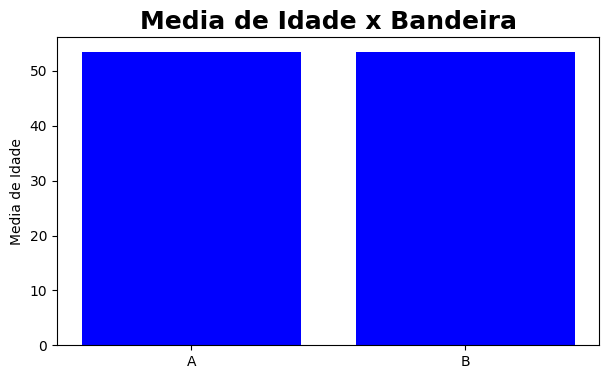

In [104]:
#Definindo o tamanho da figura
fig = plt.figure(figsize = (7,4))

#Plotando o grafico

plt.bar(Idade_bandeira['bandeira'],Idade_bandeira['idade'], color = "blue")
plt.ylabel("Media de Idade")
plt.title("Media de Idade x Bandeira", loc = 'center', fontsize = 18, fontweight = 'bold', color = 'Black');

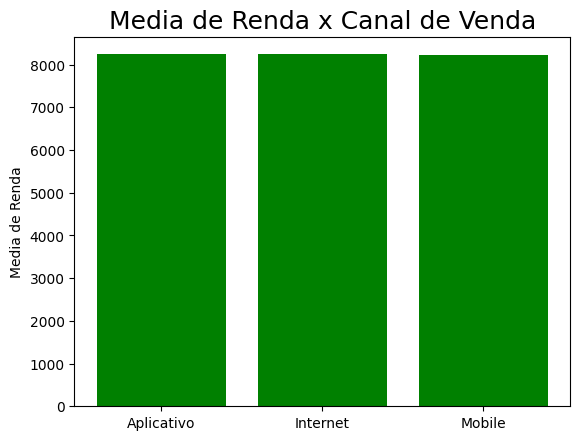

In [105]:
#Plotando o Segundo Grafico


plt.bar(renda_canal["id_canal_venda"], renda_canal['renda'], color='green')

plt.ylabel('Media de Renda')

plt.title('Media de Renda x Canal de Venda', loc = 'center', fontsize=18, color='black');

In [112]:
vendas_data.head()

,Data,id_compra
0,2023-01-02,665
1,2023-01-03,607
2,2023-01-04,677
3,2023-01-05,669
4,2023-01-06,673


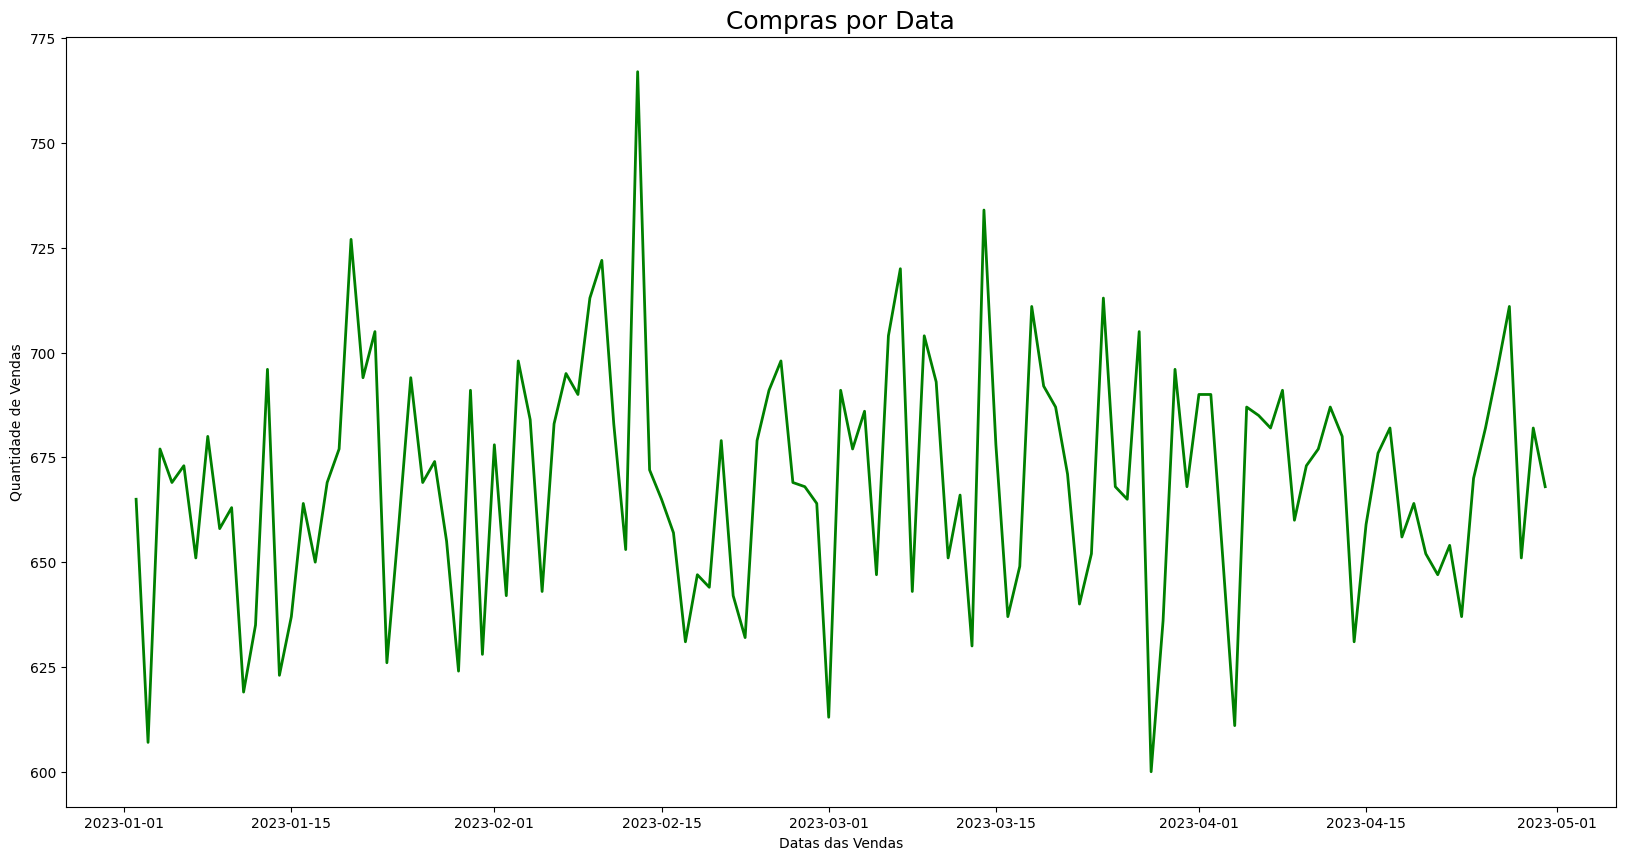

In [120]:
#Compras por mes

fig = plt.figure(figsize = (20,10))

plt.xlabel('Datas das Vendas')

plt.title('Compras por Data', loc = 'center', fontsize=18, color='black')

plt.ylabel('Quantidade de Vendas')

x = vendas_data['Data']

y = vendas_data['id_compra']

plt.plot(x,y,color='green', linewidth = '2' )

plt.show()

In [125]:
preço_departamento = round(preço_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)
preço_departamento.head()

,Nome_Departamento,Preço_com_frete
0,TV_e_Video,9847.26
1,TVs_e_Acessorios,2058.70
2,Informatica,2018.26
3,Linha_Industrial,1668.68
4,Cine_e_Foto,1461.08


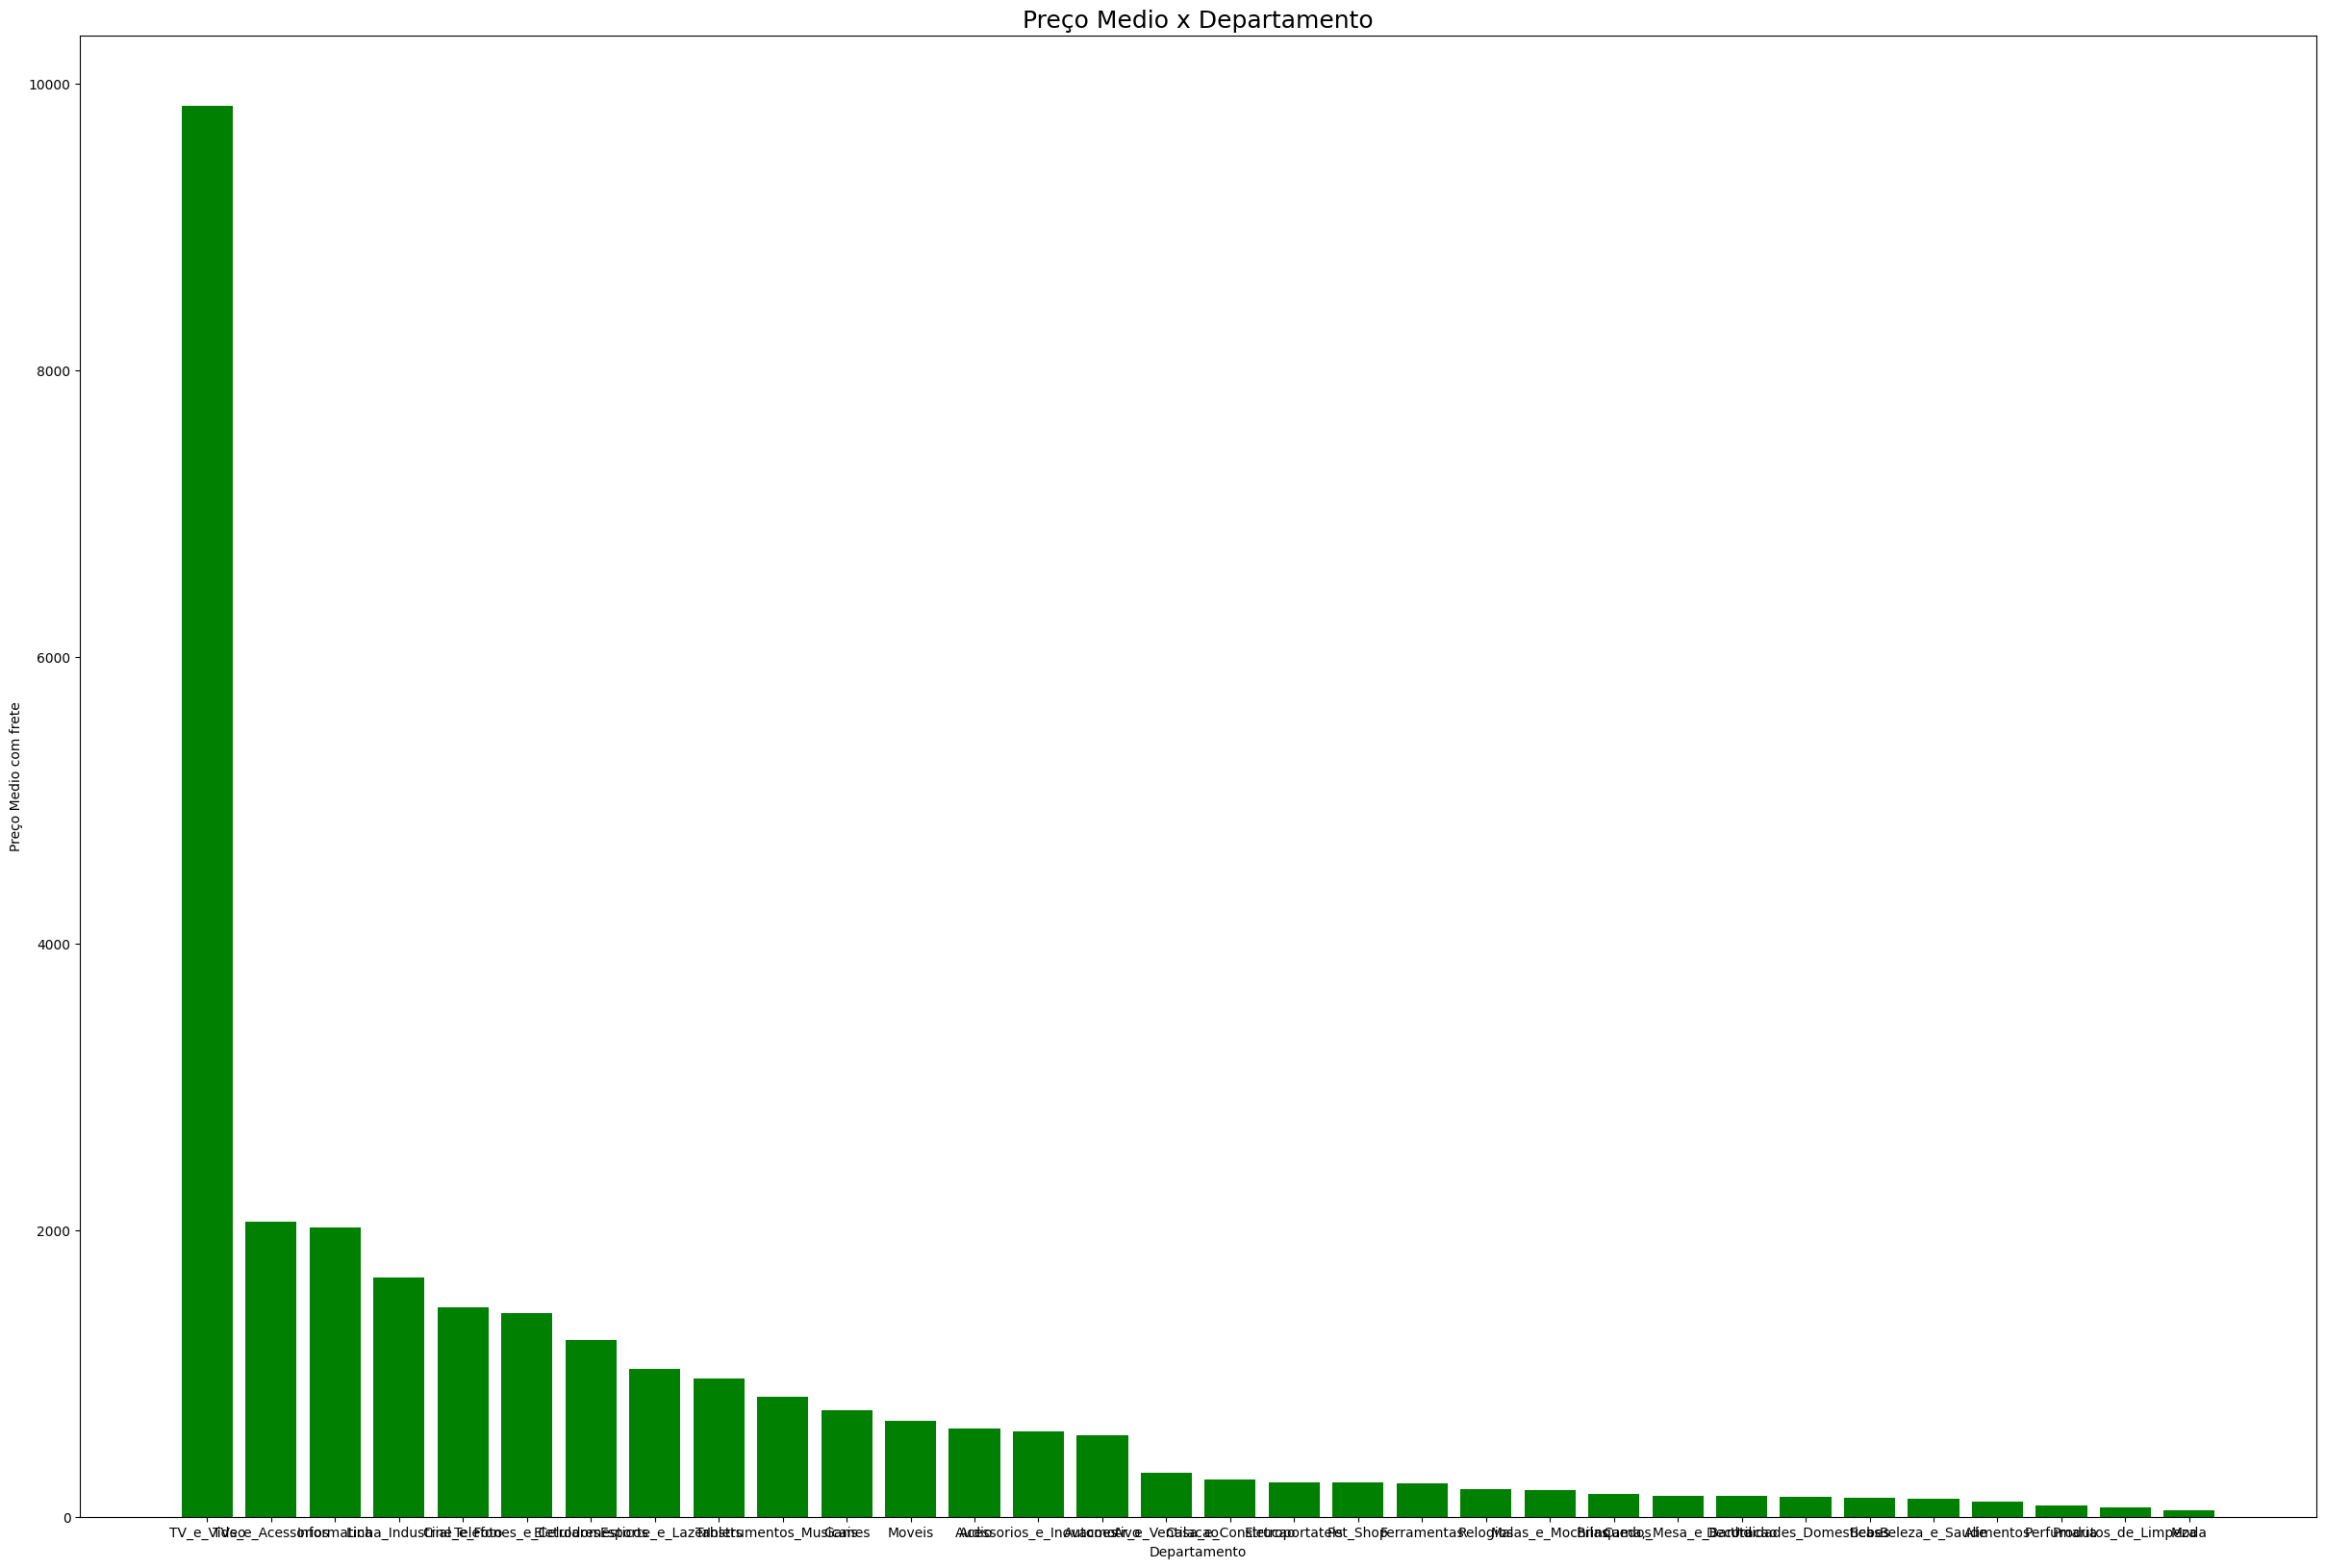

In [127]:
fig = plt.figure(figsize = (30,20))

plt.xlabel('Departamento')

plt.ylabel('Preço Medio com frete')

plt.title('Preço Medio x Departamento', loc = 'center', fontsize=18, color='black')

x = preço_departamento['Nome_Departamento']

y = preço_departamento['Preço_com_frete']

plt.bar(x,y, color= 'green')

plt.show()

## Funçoes Plotly

Primeiro passo é baixar as bibliotecas


            %pip install plotly
            %pip install cufflinks
            %pip instal chart-studio


Em seguida temos que fazer o import delas normalmente


    import chart_studio.plotly as py

    import cufflinks as cf

    import plotly.graph_objects as go

    import plotly.express as px



1.   Grafico de barras

Utilizado para plota graficos de barras

Sintaxe - px.bar(base , x = [coluna da base], y = [coluna da base], Color = )


2.   Garfico de Linha

Muito utilizado para representação de tempo

Sintaxe - px.line(base, x = [coluna da base], y = [coluna da base], Color = )


6.   Item da lista
7.   Item da lista
8.   Item da lista
9.   Item da lista
10.   Item da lista

In [129]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.7 MB/s eta 0:00:00


In [132]:
import chart_studio.plotly as py

import cufflinks as cf

import plotly.graph_objects as go

import plotly.express as px

In [133]:
#Grafico de barras

px.bar(Idade_bandeira, x = 'bandeira', y = 'idade')

In [134]:
#Grafico de linha

px.line(vendas_data, x = 'Data', y ='id_compra' )

In [136]:
px.bar(preço_departamento, x = 'Nome_Departamento', y ='Preço_com_frete')